In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [12]:
# Load the data from the CSV file
df = pd.read_csv('D:\\CubeAI Internship\\Task\\Task-10 Social Media Users Dataset\\New folder\\SocialMediaUsersDataset.csv')


In [13]:
# Checking for missing values
print(df.isnull().sum())

UserID       0
Name         0
Gender       0
DOB          0
Interests    0
City         0
Country      0
dtype: int64


In [25]:
# Converting DOB to datetime format
df['DOB'] = pd.to_datetime(df['DOB'])

# Calculating age
current_year = pd.Timestamp.now().year
df['Age'] = current_year - df['DOB'].dt.year

In [15]:
# clean and split interests
def clean_interests(interests):
    interests = interests.replace("'", "").split(', ')
    return list(set(interests))

In [16]:
df['Interests'] = df['Interests'].apply(clean_interests)

# Standardizing city and country names
df['City'] = df['City'].str.title()
df['Country'] = df['Country'].str.title()

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   UserID     100000 non-null  int64         
 1   Name       100000 non-null  object        
 2   Gender     100000 non-null  object        
 3   DOB        100000 non-null  datetime64[ns]
 4   Interests  100000 non-null  object        
 5   City       100000 non-null  object        
 6   Country    100000 non-null  object        
 7   Age        100000 non-null  int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(5)
memory usage: 5.7+ MB


In [17]:

# Displaying basic statistics
print(df.describe(include='all'))

               UserID        Name  Gender                         DOB  \
count   100000.000000      100000  100000                      100000   
unique            NaN       92580       2                         NaN   
top               NaN  John Smith    Male                         NaN   
freq              NaN          21   50069                         NaN   
mean     50000.500000         NaN     NaN  1979-06-29 09:00:12.096000   
min          1.000000         NaN     NaN         1954-01-01 00:00:00   
25%      25000.750000         NaN     NaN         1966-08-20 00:00:00   
50%      50000.500000         NaN     NaN         1979-07-06 00:00:00   
75%      75000.250000         NaN     NaN         1992-04-26 00:00:00   
max     100000.000000         NaN     NaN         2004-12-30 00:00:00   
std      28867.657797         NaN     NaN                         NaN   

        Interests         City        Country            Age  
count      100000       100000         100000  100000.000000

Gender Distribution

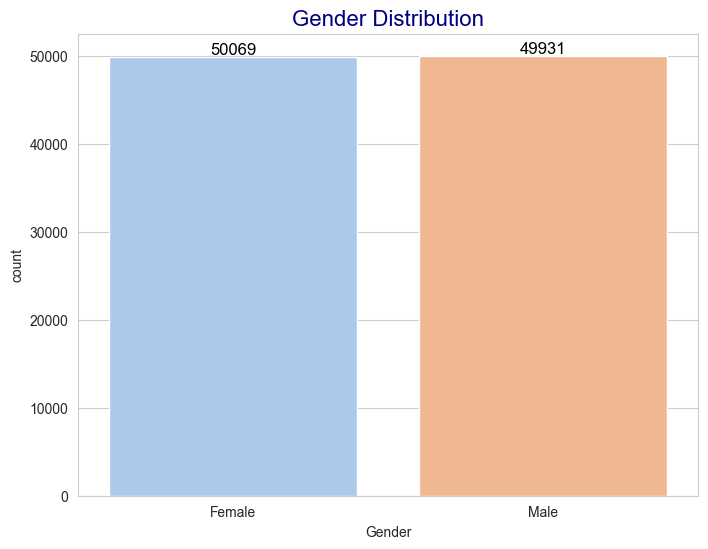

In [18]:

plt.figure(figsize=(8, 6))
gender_counts = df['Gender'].value_counts()
sns.countplot(x='Gender', data=df, palette='pastel')
plt.title('Gender Distribution', fontsize=16, color='navy')

for p, count in zip(plt.gca().patches, gender_counts):
    plt.gca().annotate(f"{count}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=12, color='black')
plt.show()

Age Distribution

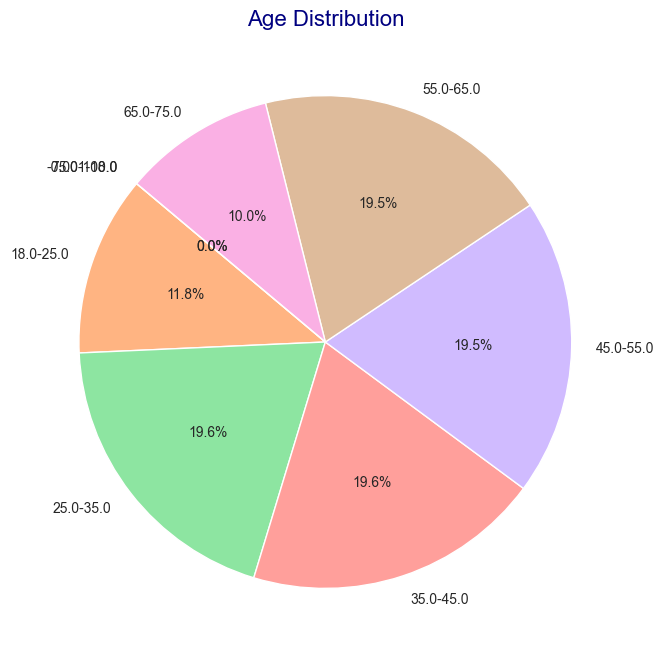

In [19]:

plt.figure(figsize=(8, 8))
age_bins = pd.cut(df['Age'], bins=[0, 18, 25, 35, 45, 55, 65, 75, 100], include_lowest=True)
age_counts = age_bins.value_counts().sort_index()
labels = [f"{interval.left}-{interval.right}" for interval in age_counts.index]
plt.pie(age_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Age Distribution', fontsize=16, color='navy')
plt.show()

Top Interests

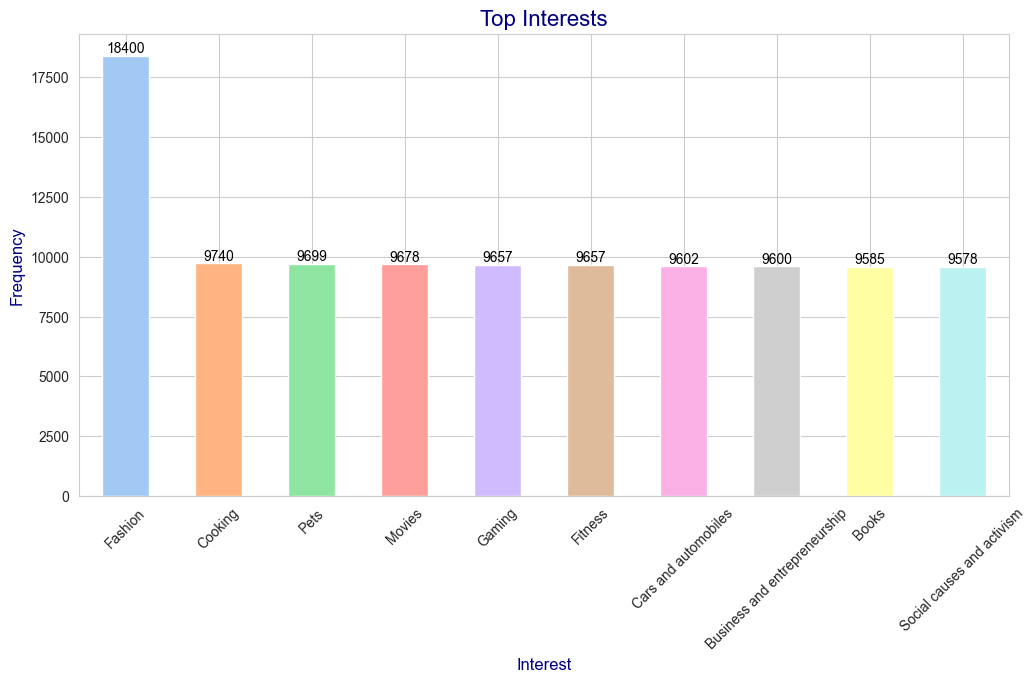

In [20]:
all_interests = [interest for sublist in df['Interests'] for interest in sublist]
interest_counts = pd.Series(all_interests).value_counts()

plt.figure(figsize=(12, 6))
interest_counts.head(10).plot(kind='bar', color=sns.color_palette('pastel'))
plt.title('Top Interests', fontsize=16, color='navy')
plt.xlabel('Interest', fontsize=12, color='navy')
plt.ylabel('Frequency', fontsize=12, color='navy')

for i, v in enumerate(interest_counts.head(10)):
    plt.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=10, color='black')
plt.xticks(rotation=45)
plt.show()

In [21]:
# Counting users by country
country_counts = df['Country'].value_counts()

Top 10 Countries by User Count

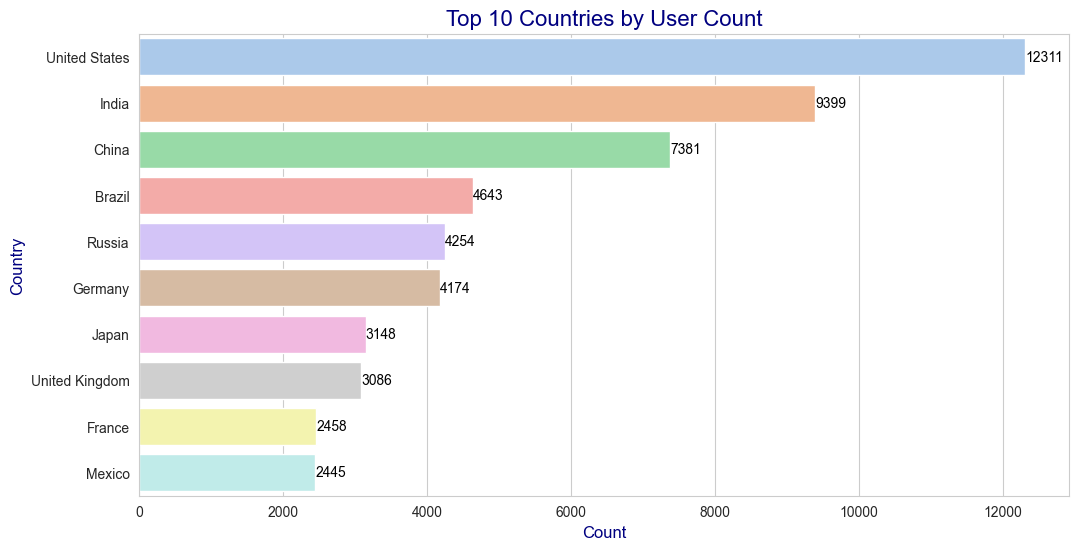

In [22]:
plt.figure(figsize=(12, 6))
sns.barplot(y=country_counts.head(10).index, x=country_counts.head(10).values, palette='pastel')
plt.title('Top 10 Countries by User Count', fontsize=16, color='navy')
plt.xlabel('Count', fontsize=12, color='navy')
plt.ylabel('Country', fontsize=12, color='navy')
for i, v in enumerate(country_counts.head(10)):
    plt.text(v, i, str(v), ha='left', va='center', fontsize=10, color='black')
plt.show()

Bottom 10 Countries by User Count

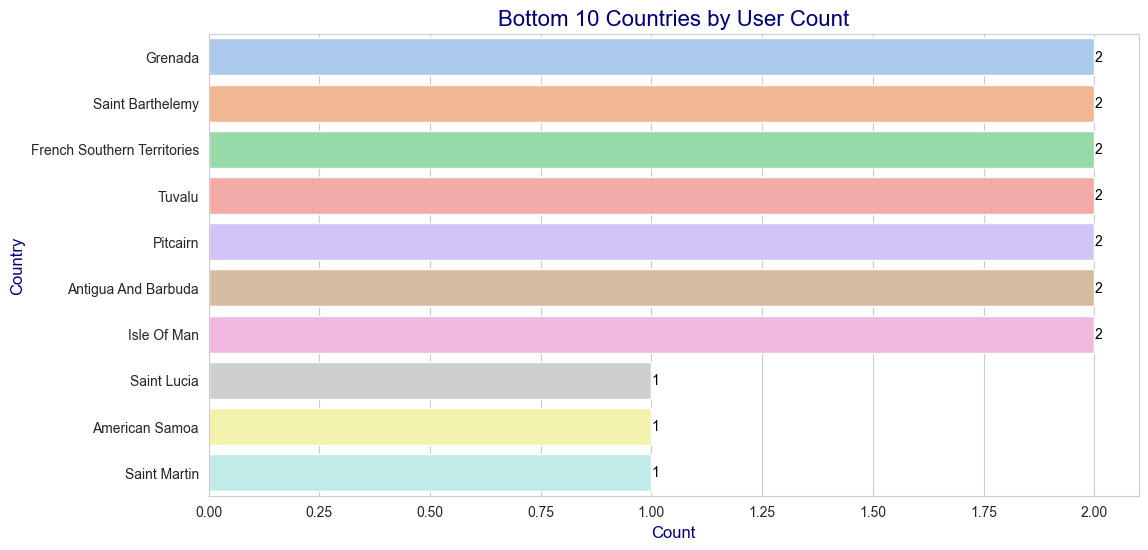

In [23]:
plt.figure(figsize=(12, 6))
sns.barplot(y=country_counts.tail(10).index, x=country_counts.tail(10).values, palette='pastel')
plt.title('Bottom 10 Countries by User Count', fontsize=16, color='navy')
plt.xlabel('Count', fontsize=12, color='navy')
plt.ylabel('Country', fontsize=12, color='navy')
for i, v in enumerate(country_counts.tail(10)):
    plt.text(v, i, str(v), ha='left', va='center', fontsize=10, color='black')
plt.show()

Age Distribution by Frequency of usage

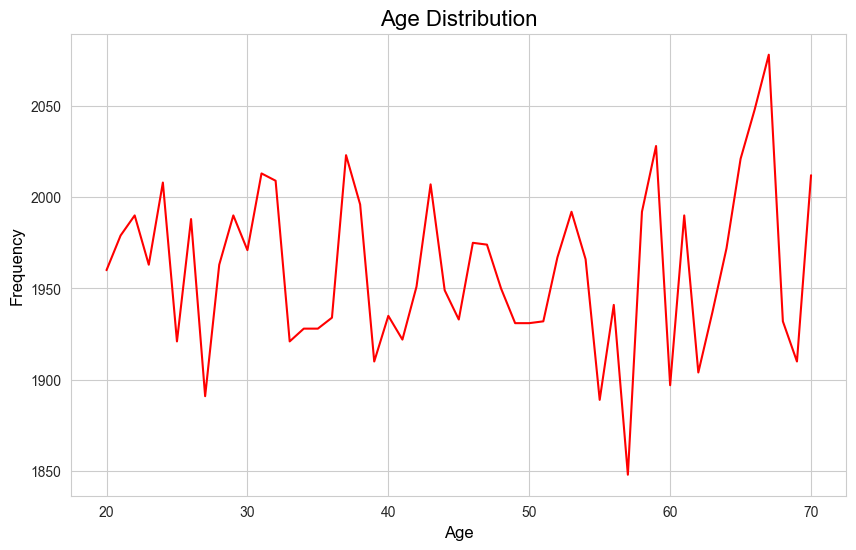

In [24]:

plt.figure(figsize=(10, 6))
age_counts = df['Age'].value_counts().sort_index()
age_counts.plot(kind='line', color='Red')
plt.title('Age Distribution', fontsize=16, color='black')
plt.xlabel('Age', fontsize=12, color='black')
plt.ylabel('Frequency', fontsize=12, color='black')
plt.grid(True)
plt.show()

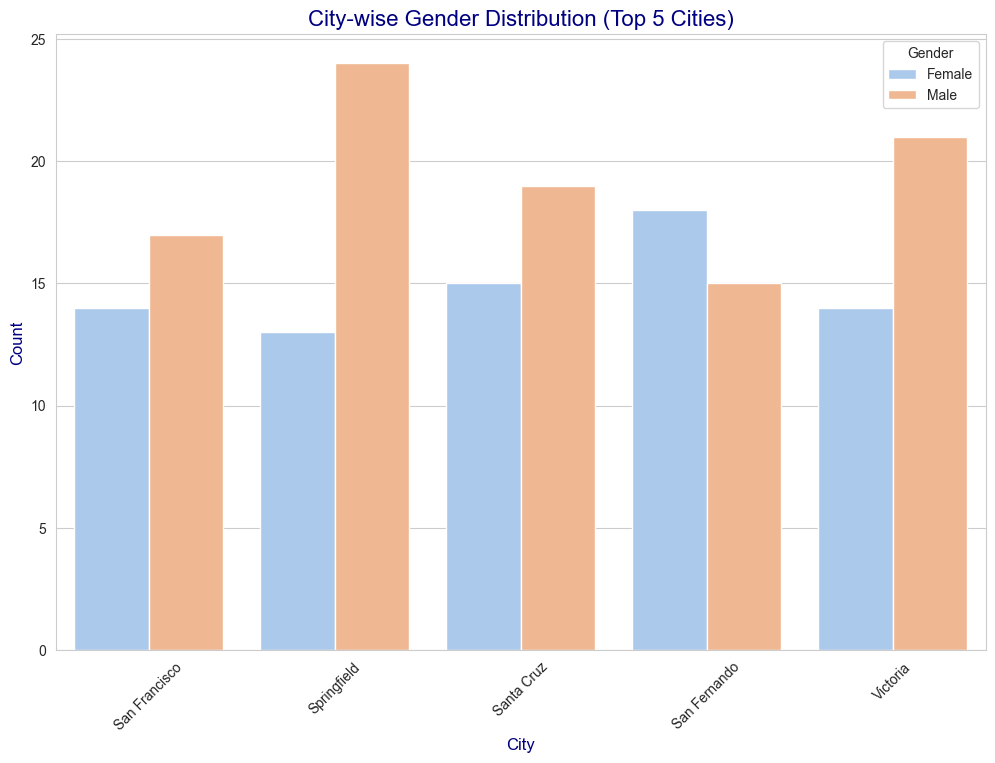

In [28]:
# Find the top 5 cities with more usage
top_cities = df['City'].value_counts().nlargest(5).index

# Filter the DataFrame to include only the top 5 cities
df_top_cities = df[df['City'].isin(top_cities)]

# Visualize city-wise gender distribution
plt.figure(figsize=(12, 8))
sns.countplot(x='City', hue='Gender', data=df_top_cities, palette='pastel')
plt.title('City-wise Gender Distribution (Top 5 Cities)', fontsize=16, color='navy')
plt.xlabel('City', fontsize=12, color='navy')
plt.ylabel('Count', fontsize=12, color='navy')
plt.xticks(rotation=45)
plt.legend(title='Gender', loc='upper right')
plt.show()